Credit Card Eligibility Prediction 

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df_app = pd.read_csv('application_record.csv')
df_app.sample(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
268636,6471617,F,N,Y,0,234000.0,Working,Higher education,Separated,House / apartment,-21892,-8577,1,0,0,0,Laborers,1.0
378729,6601835,F,N,Y,2,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12960,-1334,1,0,0,0,Sales staff,4.0
303780,6211322,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22013,365243,1,0,0,0,NaN,2.0


In [38]:
df_cred = pd.read_csv('credit_record.csv')
df_cred.sample(3)

,ID,MONTHS_BALANCE,STATUS
119543,5010390,-20,0
918095,5125697,-38,0
1018099,5148504,-27,C


In [39]:
final_df = df_app.merge(df_cred, on=['ID'],how = 'inner')
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [40]:
final_df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [41]:
final_df.shape

(777715, 20)

In [42]:
final_df.dropna(inplace=True)
final_df.shape

(537667, 20)

In [43]:
final_df.STATUS = final_df.STATUS.map({"X":1,"C":1, "0":1, "1":0, "2":0, "3":0, "4":0, "5":0})
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
32,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1,1
33,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,1
34,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3,1
35,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4,1


Label Encoding binary values Yes/No

In [44]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
final_df['CODE_GENDER'] = le.fit_transform(final_df['CODE_GENDER'])
final_df['FLAG_OWN_CAR'] = le.fit_transform(final_df['FLAG_OWN_CAR'])
final_df['FLAG_OWN_REALTY'] = le.fit_transform(final_df['FLAG_OWN_REALTY'])

Code_Gender = Female -> 0 Male -> 1

Flag_own_car/Flag_own_reality = N -> 0 Y -> 1




In [45]:
final_df.sample(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
765632,5150070,0,0,1,2,112500.0,State servant,Higher education,Married,House / apartment,-11648,-3243,1,0,0,0,Core staff,4.0,-54,1
769456,5024063,1,0,0,3,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10980,-2893,1,0,0,0,Core staff,5.0,-9,1
572127,5113378,0,0,0,0,90000.0,Working,Secondary / secondary special,Married,Municipal apartment,-19120,-2567,1,0,1,0,Laborers,2.0,-6,1
3260,5009027,0,1,1,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19861,-10843,1,0,0,1,Laborers,2.0,-10,1
510762,5096879,0,0,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-15830,-8130,1,0,0,0,Laborers,2.0,-35,1


The dataset with values which are approved or not for credit card eligibility

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


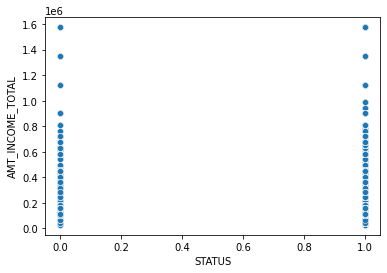

In [46]:
sns.scatterplot(final_df.STATUS,final_df.AMT_INCOME_TOTAL)

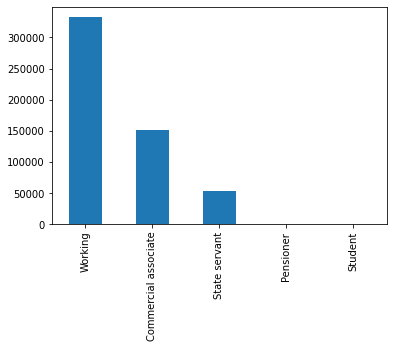

In [47]:
final_df.NAME_INCOME_TYPE.value_counts().plot(kind='bar')

This is to remove the "pensioner" and "student" record categorical value and replace it with "others" cause both are negligible

In [48]:
def income_tans(df,col):
    result_col = []
    for i in df[col]:
        if i == 'Working':
            result_col.append('Working')
        elif i == 'Commercial associate':
            result_col.append('Commercial associate')
        elif i == 'State servant':
            result_col.append('State servant')
        else:
            result_col.append('others')
    df[col] = result_col
    return df
    
income_tans(final_df,'NAME_INCOME_TYPE')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
32,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1,1
33,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,1
34,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3,1
35,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,1
777711,5150337,1,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,0
777712,5150337,1,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,0
777713,5150337,1,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,1


In [49]:
final_df.NAME_INCOME_TYPE.value_counts()

Working                 332868
Commercial associate    151412
State servant            52733
others                     654
Name: NAME_INCOME_TYPE, dtype: int64

In [50]:
len(final_df['NAME_INCOME_TYPE'])

537667

there are 2 values in a single categorical data, either one of them can be used, so just using one value

In [51]:
final_df.NAME_EDUCATION_TYPE = final_df.NAME_EDUCATION_TYPE.str.split('/').str[0]
final_df.NAME_EDUCATION_TYPE.value_counts()

Secondary            358317
Higher education     153770
Incomplete higher     20590
Lower secondary        4556
Academic degree         434
Name: NAME_EDUCATION_TYPE, dtype: int64

In [52]:
final_df.NAME_FAMILY_STATUS = final_df.NAME_FAMILY_STATUS.str.split('/').str[0]
final_df.NAME_FAMILY_STATUS.value_counts()

Married           384003
Single             65944
Civil marriage     44083
Separated          31394
Widow              12243
Name: NAME_FAMILY_STATUS, dtype: int64

In [53]:
final_df.NAME_HOUSING_TYPE = final_df.NAME_HOUSING_TYPE.str.split('/').str[0]
final_df.NAME_HOUSING_TYPE.value_counts()

House                  474177
With parents            29351
Municipal apartment     18023
Rented apartment         8561
Office apartment         4159
Co-op apartment          3396
Name: NAME_HOUSING_TYPE, dtype: int64

In [54]:
final_df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,1,1,1,0,112500.0,Working,Secondary,Married,House,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
32,5008806,1,1,1,0,112500.0,Working,Secondary,Married,House,-21474,-1134,1,0,0,0,Security staff,2.0,-1,1
33,5008806,1,1,1,0,112500.0,Working,Secondary,Married,House,-21474,-1134,1,0,0,0,Security staff,2.0,-2,1
34,5008806,1,1,1,0,112500.0,Working,Secondary,Married,House,-21474,-1134,1,0,0,0,Security staff,2.0,-3,1
35,5008806,1,1,1,0,112500.0,Working,Secondary,Married,House,-21474,-1134,1,0,0,0,Security staff,2.0,-4,1


No of days of the person's birth and the month are represented in days, converting them to years and updating it

In [55]:
final_df['Age'] = -(final_df['DAYS_BIRTH'])//365
final_df['employee_from_years'] = -(final_df['DAYS_EMPLOYED'])//365
final_df.drop(columns=('DAYS_BIRTH'), inplace=True)
final_df.drop(columns=('DAYS_EMPLOYED'), inplace=True)
final_df.head(4)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Age,employee_from_years
31,5008806,1,1,1,0,112500.0,Working,Secondary,Married,House,1,0,0,0,Security staff,2.0,0,1,58,3
32,5008806,1,1,1,0,112500.0,Working,Secondary,Married,House,1,0,0,0,Security staff,2.0,-1,1,58,3
33,5008806,1,1,1,0,112500.0,Working,Secondary,Married,House,1,0,0,0,Security staff,2.0,-2,1,58,3
34,5008806,1,1,1,0,112500.0,Working,Secondary,Married,House,1,0,0,0,Security staff,2.0,-3,1,58,3


In [56]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537667 entries, 31 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  int64  
 2   FLAG_OWN_CAR         537667 non-null  int64  
 3   FLAG_OWN_REALTY      537667 non-null  int64  
 4   CNT_CHILDREN         537667 non-null  int64  
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_INCOME_TYPE     537667 non-null  object 
 7   NAME_EDUCATION_TYPE  537667 non-null  object 
 8   NAME_FAMILY_STATUS   537667 non-null  object 
 9   NAME_HOUSING_TYPE    537667 non-null  object 
 10  FLAG_MOBIL           537667 non-null  int64  
 11  FLAG_WORK_PHONE      537667 non-null  int64  
 12  FLAG_PHONE           537667 non-null  int64  
 13  FLAG_EMAIL           537667 non-null  int64  
 14  OCCUPATION_TYPE      537667 non-null  object 
 15  CNT_FAM_MEMBERS 

ID and Flag Mobile are useless in this prediction, Flag mobile doesn't have any correlation

In [57]:
final_df.drop(columns = ['ID','FLAG_MOBIL'], inplace = True)
final_df.sample(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Age,employee_from_years
442930,1,1,1,0,179100.0,Commercial associate,Secondary,Married,Office apartment,0,0,0,Drivers,2.0,-1,1,44,2
382866,0,0,1,1,90000.0,Commercial associate,Secondary,Married,House,0,1,0,Private service staff,3.0,-47,1,27,5
426987,0,0,0,0,270000.0,State servant,Secondary,Separated,House,0,1,1,Medicine staff,1.0,-14,1,53,33
432948,0,1,0,0,157500.0,Working,Incomplete higher,Single,House,1,0,0,Managers,1.0,-45,1,31,8
712527,1,1,0,2,135000.0,State servant,Secondary,Married,House,1,1,0,Core staff,4.0,-1,1,38,17
572548,1,1,1,0,450000.0,Commercial associate,Higher education,Single,House,0,0,1,Sales staff,1.0,-37,1,29,1
554764,1,1,0,0,76500.0,Working,Secondary,Married,House,0,0,0,Laborers,2.0,-30,1,57,1
703167,1,0,1,1,360000.0,Working,Secondary,Civil marriage,House,0,0,0,Sales staff,3.0,-2,1,31,6
435628,0,0,0,0,67500.0,Working,Secondary,Civil marriage,House,0,0,0,Cooking staff,2.0,-25,1,42,0
458542,0,1,1,0,256500.0,Commercial associate,Secondary,Married,House,0,0,1,Core staff,2.0,-24,1,37,2


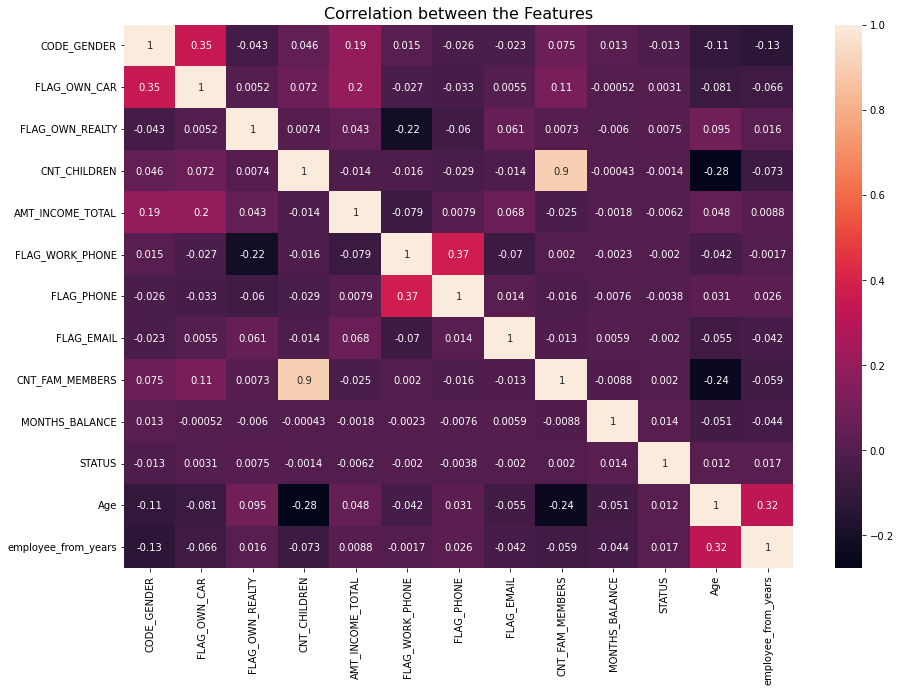

In [58]:
plt.figure(figsize = (15,10))
sns.heatmap(final_df.corr(), annot = True )
plt.title('Correlation between the Features', size = 16)
plt.show()

In [59]:
cols = final_df.columns.tolist()

Moving the Prediction of Eligible or not credit card column name "STATUS" to last column of the DataFrame table

In [60]:
new_cols = [col for col in final_df.columns if col != 'STATUS'] + ['STATUS']
length = final_df.count(axis = 1)

In [61]:
final_df = pd.DataFrame(final_df,
                  columns=new_cols)

In [62]:
final_df.head(5)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,Age,employee_from_years,STATUS
31,1,1,1,0,112500.0,Working,Secondary,Married,House,0,0,0,Security staff,2.0,0,58,3,1
32,1,1,1,0,112500.0,Working,Secondary,Married,House,0,0,0,Security staff,2.0,-1,58,3,1
33,1,1,1,0,112500.0,Working,Secondary,Married,House,0,0,0,Security staff,2.0,-2,58,3,1
34,1,1,1,0,112500.0,Working,Secondary,Married,House,0,0,0,Security staff,2.0,-3,58,3,1
35,1,1,1,0,112500.0,Working,Secondary,Married,House,0,0,0,Security staff,2.0,-4,58,3,1


Splitting the table records, making it ready for the predictions

In [63]:
X = final_df.iloc[:,:-1].values
y = final_df.iloc[:, -1].values

OneHotEncoding all 5 columns which are in categorical variable, ML Models work with numerical Values

In [64]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[5,6,7,8,12])],remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [65]:
final_df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,Age,employee_from_years,STATUS
31,1,1,1,0,112500.0,Working,Secondary,Married,House,0,0,0,Security staff,2.0,0,58,3,1
32,1,1,1,0,112500.0,Working,Secondary,Married,House,0,0,0,Security staff,2.0,-1,58,3,1
33,1,1,1,0,112500.0,Working,Secondary,Married,House,0,0,0,Security staff,2.0,-2,58,3,1
34,1,1,1,0,112500.0,Working,Secondary,Married,House,0,0,0,Security staff,2.0,-3,58,3,1
35,1,1,1,0,112500.0,Working,Secondary,Married,House,0,0,0,Security staff,2.0,-4,58,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,1,0,1,0,112500.0,Working,Secondary,Single,Rented apartment,0,0,0,Laborers,1.0,-9,25,3,1
777711,1,0,1,0,112500.0,Working,Secondary,Single,Rented apartment,0,0,0,Laborers,1.0,-10,25,3,0
777712,1,0,1,0,112500.0,Working,Secondary,Single,Rented apartment,0,0,0,Laborers,1.0,-11,25,3,0
777713,1,0,1,0,112500.0,Working,Secondary,Single,Rented apartment,0,0,0,Laborers,1.0,-12,25,3,1


In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (430133, 50)
X_test : (107534, 50)
y_train : (430133,)
y_test : (107534,)


In [67]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
regression.fit(X_train,y_train)

LogisticRegression()

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = regression.predict(X_test)

In [69]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_test,y_pred)

[[     0      0]
 [  1698 105836]]


0.9842096453214797